# Data Challenge-prediction of AirBnB listings in NYC

By Dequan Er, Ph.D.  
Created 10:30 AM 2020/02/01

## Problem Statement

Attached you will find the file listings.csv which provides data on around 50,000 AirBnB listings in New York City. Given only this data, you want to create a model to predict how much you can charge for new listings while keeping vacancy down. Please put together a brief analysis of the dataset and show how you would go about creating a model to predict a listing price, while taking market demand into account. 

### 1. Import libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy import stats

### 2. Load Data


In [4]:
df = pd.read_csv('listings.csv')
#df_train, df_test = train_test_split(df, test_size=0.2,random_state =42)


exam the first five rows of data to understand how it looks like

In [5]:
df.shape

(48864, 15)

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2,288,46,0.39,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1,365,0,NaN,150
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1,212,274,4.64,89
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1,0,9,0.10,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,1,127,75,0.60,200


There is 48864 entry of data with 14 features and 1 label (price) to be predicted.

In [7]:
df.describe()

,id,host_id,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,price
count,4.886400e+04,4.886400e+04,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,38733.000000,48864.000000
mean,1.940851e+07,6.943161e+07,40.728664,-73.951850,7.093116,7.438278,112.483505,23.392191,1.365694,151.453176
std,1.124290e+07,8.058217e+07,0.054794,0.046440,20.264170,34.949053,132.373994,44.939690,1.692891,236.585525
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,9.577635e+06,8.048590e+06,40.689797,-73.982952,1.000000,1.000000,0.000000,1.000000,0.190000,69.000000
50%,1.994839e+07,3.168654e+07,40.722880,-73.955510,2.000000,1.000000,41.000000,5.000000,0.710000,105.000000
75%,2.974014e+07,1.096553e+08,40.762970,-73.935628,5.000000,2.000000,232.000000,24.000000,2.000000,175.000000
max,3.749909e+07,2.830244e+08,40.912400,-73.712990,1250.000000,343.000000,365.000000,639.000000,66.610000,10000.000000


because the id is used to identify enties, therefore not included into training features. 

In [6]:
df = df.drop(columns='id');
df.shape

(48864, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 14 columns):
name                              48848 non-null object
host_id                           48864 non-null int64
host_name                         48846 non-null object
neighbourhood_group               48864 non-null object
neighbourhood                     48864 non-null object
latitude                          48864 non-null float64
longitude                         48864 non-null float64
room_type                         48864 non-null object
minimum_nights                    48864 non-null int64
calculated_host_listings_count    48864 non-null int64
availability_365                  48864 non-null int64
number_of_reviews                 48864 non-null int64
reviews_per_month                 38733 non-null float64
price                             48864 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


### 3. preprocessing data
3.1 Data cleaning
first find missing data

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(5)

,Total,Percent
reviews_per_month,10131,0.207331
host_name,18,0.000368
name,16,0.000327
price,0,0.000000
number_of_reviews,0,0.000000


In [9]:
df['reviews_per_month'].fillna(0.0, inplace = True)
df['no_reviews'] = df['reviews_per_month']==0
df['host_name'].fillna('None' , inplace = True)
df['name'].fillna('None' , inplace = True)

In [10]:
missing_df = df.isnull().sum()
missing_df[missing_df > 0].sort_values(ascending = False)


Series([], dtype: int64)

remove abnormal price and unavailable data

In [1]:
df.drop(df[(df['price'] > 6000) & (df['availability_365'] < 1)].index , inplace = True)
np.log1p(df['price']).hist()

NameError: name 'df' is not defined

Now let's exam lable distribution

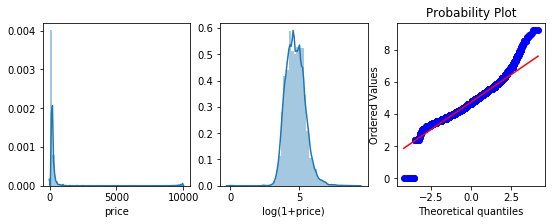

In [12]:
fig, axes = plt.subplots(1,3, figsize=(9,3));
sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log1p(df['price']), ax=axes[1]);
axes[1].set_xlabel('log(1+price)')
stats.probplot(np.log1p(df['price']), plot=plt);

Fist see the availability distribution and the price. There is high(>358) and low availability(<7).

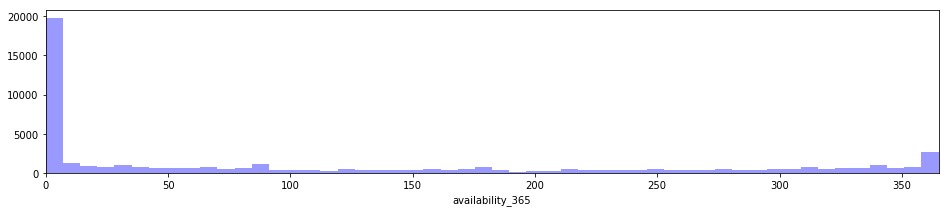

In [13]:
fig, axes = plt.subplots(1,1,figsize=(16, 3))
sns.distplot(df['availability_365'], rug=False, kde=False, color="blue", ax=axes, bins=52)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365);

3.2 Feature engineering  
Add new features about availability

In [14]:
df['all_year_avail'] = df['availability_365']>358
df['low_avail'] = df['availability_365']< 7

Text(0, 0.5, 'price')

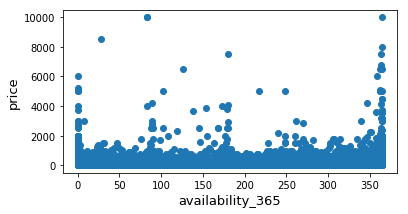

In [15]:
plt.figure(figsize=(6,3))
plt.scatter(x = df.availability_365, y = df.price)
plt.xlabel("availability_365", fontsize=13)
plt.ylabel("price", fontsize=13)
#plt.xlim(0,10)

In [12]:
# change the price to log(1+price) level
df['price'] = np.log1p(df['price'])

df = df[(df['price']) > 3]
df = df[(df['price']) < 8]

In [13]:
# add some features that better describes data
# listing name length
df['nameLen'] = df['name'].apply(lambda x: len(str(x)))
df['isDetailed'] = df['nameLen'] > 35
# host name length
df['hostNameLen'] = df['host_name'].apply(lambda x: len(str(x)))

# drop nun-numerical features
drop_elements = ['host_name', 'name','host_id']
df = df.drop(drop_elements, axis = 1)

### 4. Exploratory data analysis
distribution of categorical features

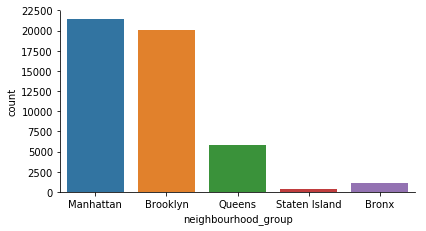

In [14]:
sns.catplot(x='neighbourhood_group', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(6, 3)

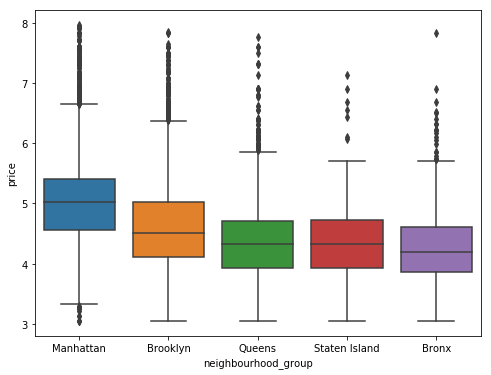

In [19]:
#box plot neighbourhood
var = 'neighbourhood_group'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
# fig.axis(ymin=0, ymax=800000);

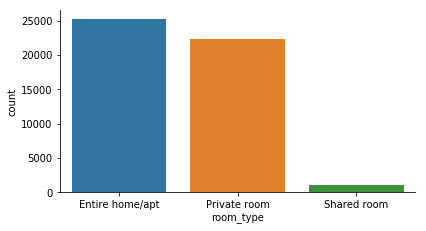

In [20]:
sns.catplot(x='room_type', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(6, 3)

relationship with categorical features

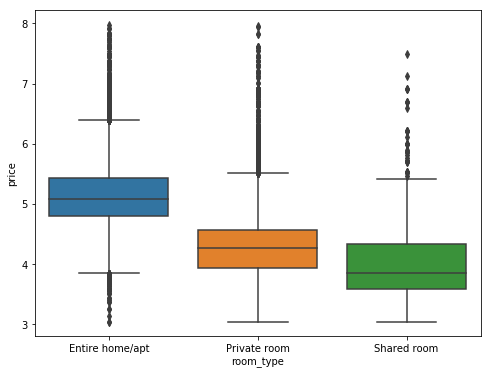

In [21]:
#box plot room_type
var = 'room_type'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
# fig.axis(ymin=0, ymax=800000);

minimum stay night

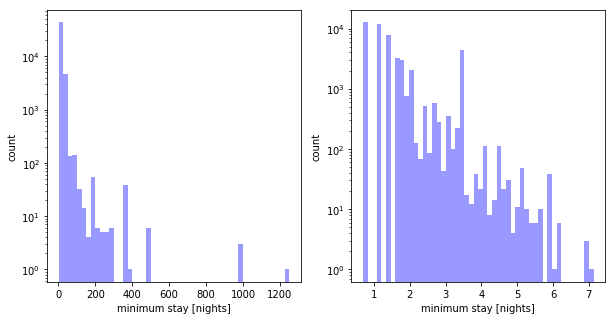

In [22]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.distplot(df['minimum_nights'], rug=False, kde=False, color="blue", ax = axes[0])
axes[0].set_yscale('log');
axes[0].set_xlabel('minimum stay [nights]');
axes[0].set_ylabel('count');

sns.distplot(np.log1p(df['minimum_nights']), rug=False, kde=False, color="blue", ax = axes[1])
axes[1].set_yscale('log');
axes[1].set_xlabel('minimum stay [nights]');
axes[1].set_ylabel('count');

We saw a log-log linear relationship of minimum stays and its counts. 


In [23]:
df['minimum_nights'] = np.log1p(df['minimum_nights'])

number of listing per area

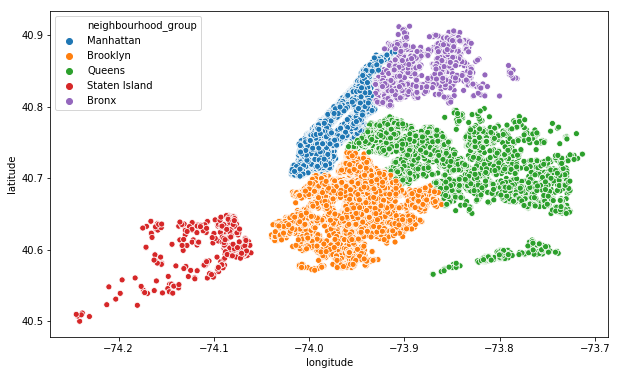

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [15]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

### 5. encoding categorical data
Now make discountinued data into features.


In [26]:
categorical_features = df.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

Categorical features: (48748, 3)


,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
numerical_features =  df.select_dtypes(exclude=['object'])
y = numerical_features.price
#numerical_features = numerical_features.drop(['price'], axis=1)

In [28]:
df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)
X = df.drop(['price'], axis=1)

### 5. visualization



In [29]:
# find most highly correlated features
corr = df.corr()
features = abs(corr['price']).sort_values(ascending = False)[:20]
features

price                               1.000000
room_type_Entire home/apt           0.626974
room_type_Private room              0.577378
neighbourhood_group_Manhattan       0.353134
longitude                           0.330320
neighbourhood_group_Brooklyn        0.191227
neighbourhood_group_Queens          0.190623
neighbourhood_Midtown               0.172583
room_type_Shared room               0.168918
neighbourhood_Bushwick              0.150041
calculated_host_listings_count      0.138859
neighbourhood_West Village          0.123473
neighbourhood_Chelsea               0.120439
neighbourhood_Bedford-Stuyvesant    0.120015
neighbourhood_Hell's Kitchen        0.118593
neighbourhood_Financial District    0.106433
neighbourhood_group_Bronx           0.104606
availability_365                    0.094636
nameLen                             0.089847
neighbourhood_East Village          0.088839
Name: price, dtype: float64

Because the one-hot vecterized features are too large to visulize, just numerical features first.

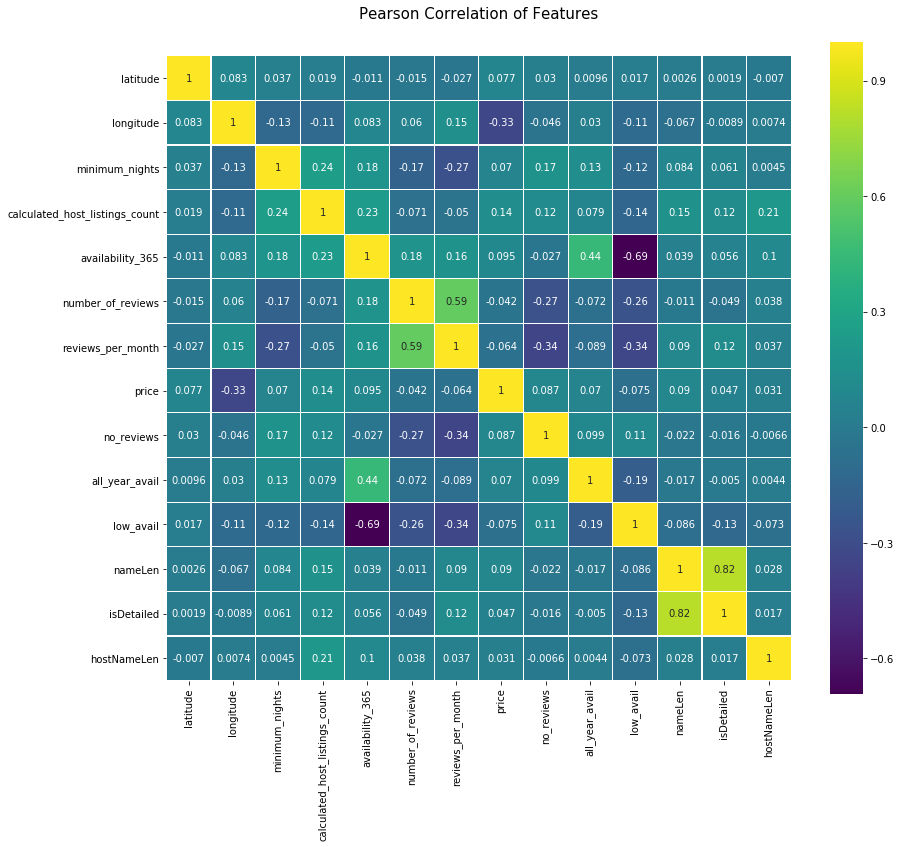

In [30]:
# plot numerical features corr
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(numerical_features.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### 6. model training

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

Using TensorFlow backend.


### 7 new model


Before choosing a model, we need to compare different preprocessing methods. Three standarization comparision are considered: StandardScaler which use (x-$\mu$)/$\sigma$,MinMaxScaler((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))), and Normalizer.

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor

#y = df.price
#X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)


std = StandardScaler()
X_std = std.fit_transform(X_train)

mms = MinMaxScaler()
X_mms = mms.fit_transform(X_train)

norm = Normalizer()
X_norm = norm.fit_transform(X_train)

In [33]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [34]:
neighbors = np.arange(1, 30)
kfold = 5
val_accuracy = { 'std' : [] , 'mms' : [] , 'norm' : [] }

bestKnr = None
bestAcc = 0.0
bestScaling = None

# precision with k
for i, k in enumerate(neighbors):
    print(k,'NN is being calculated')
    
    knr = KNeighborsRegressor(n_neighbors = k)
    
    # cross validation accuracy
    
    s1 = np.mean(cross_val_score(knr, X_std, y_train, cv=kfold))
    val_accuracy['std'].append(s1)
    
    s2 = np.mean(cross_val_score(knr, X_mms, y_train, cv=kfold))
    val_accuracy['mms'].append(s2)
    
    s3 = np.mean(cross_val_score(knr, X_norm, y_train, cv=kfold))
    val_accuracy['norm'].append(s3)
    
    if s1 > bestAcc:
        bestAcc = s1
        bestKnr = knr
        bestScaling = 'std'
        
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnr = knr
        bestScaling = 'mms'
        
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnr = knr
        bestScaling = 'norm'

1 NN is being calculated
2 NN is being calculated
3 NN is being calculated
4 NN is being calculated
5 NN is being calculated
6 NN is being calculated
7 NN is being calculated
8 NN is being calculated
9 NN is being calculated
10 NN is being calculated
11 NN is being calculated
12 NN is being calculated
13 NN is being calculated
14 NN is being calculated
15 NN is being calculated
16 NN is being calculated
17 NN is being calculated
18 NN is being calculated
19 NN is being calculated
20 NN is being calculated
21 NN is being calculated
22 NN is being calculated
23 NN is being calculated
24 NN is being calculated
25 NN is being calculated
26 NN is being calculated
27 NN is being calculated
28 NN is being calculated
29 NN is being calculated


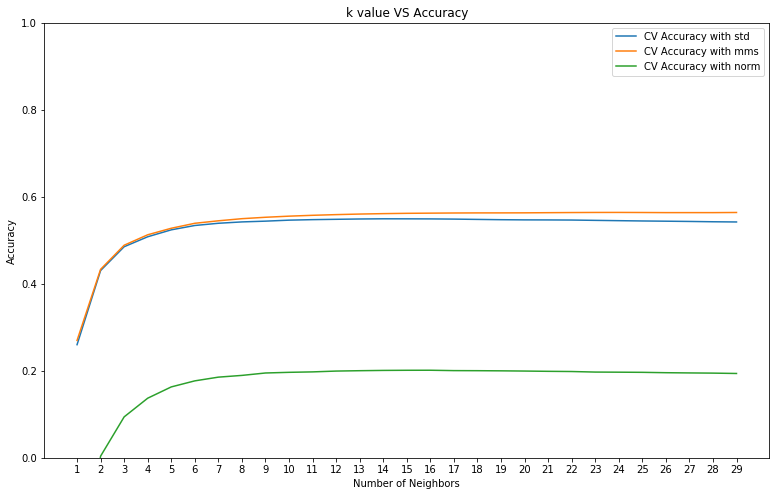

Best Accuracy with feature scaling: 0.5642352306589357
Best kNN classifier: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='uniform')
Best scaling: mms


In [35]:
# Plotting
plt.figure(figsize=[13,8])

plt.plot(neighbors, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neighbors, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neighbors, val_accuracy['norm'], label = 'CV Accuracy with norm')

plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.xticks(neighbors)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnr)
print('Best scaling:', bestScaling)

In this plot, we saw that ‘mms’ standardization is the best method.  

Let us build a simple model with this conclusion at hand. Sort the importance of the features again, select the appropriate features for modeling. Here the 20 most important features are:

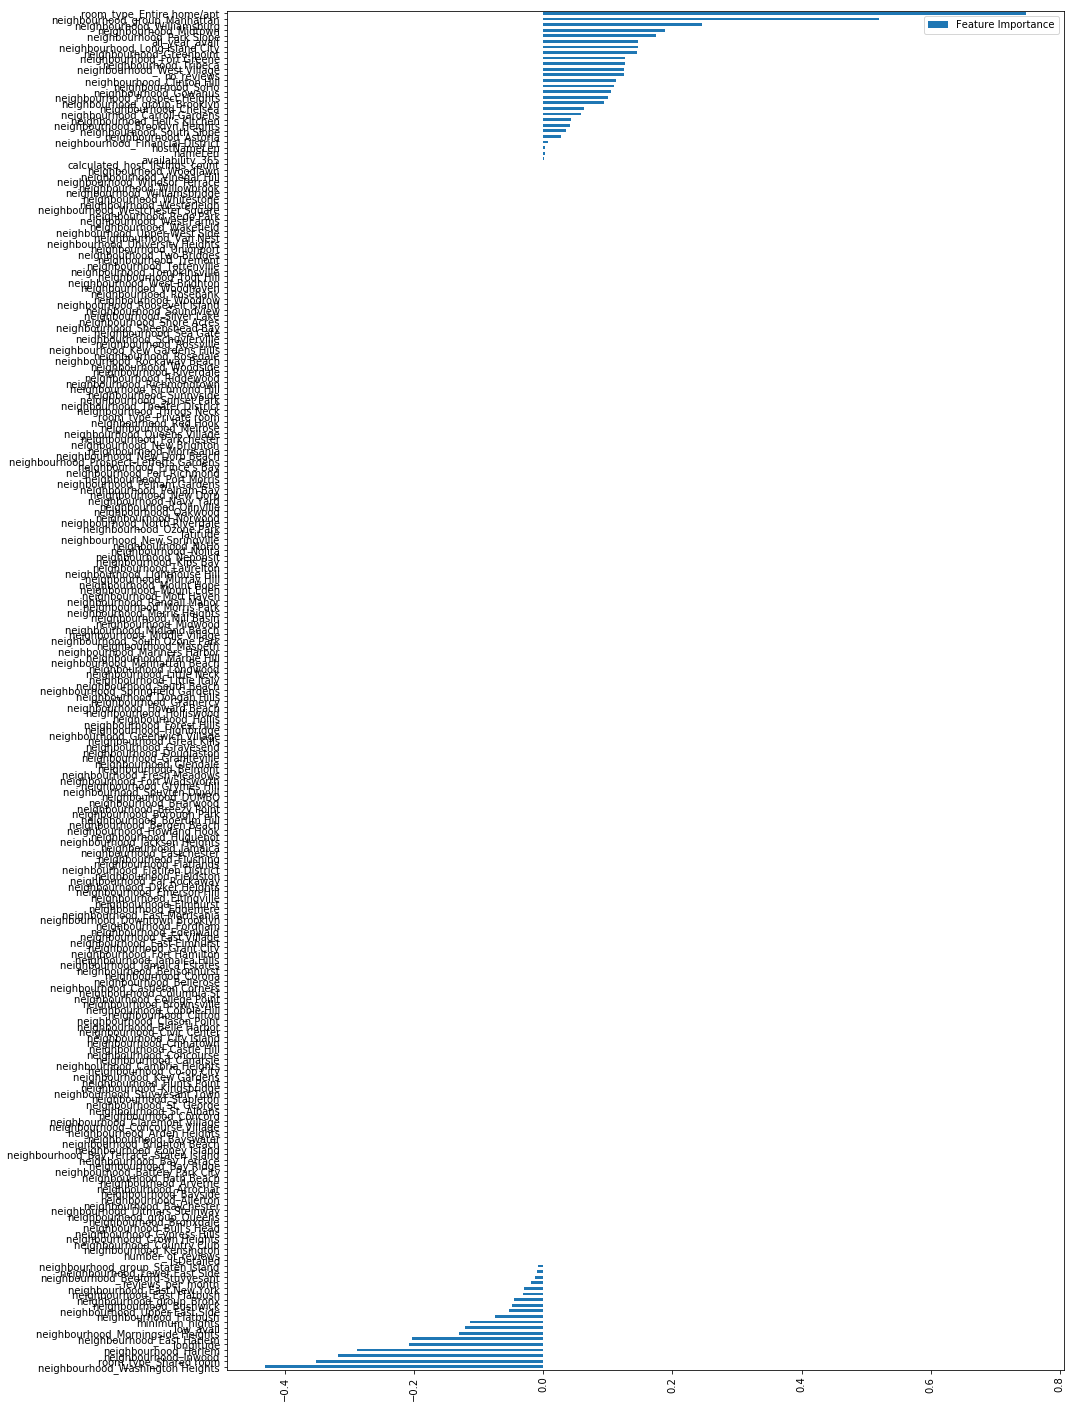

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

FI_lasso = pd.DataFrame({'Feature Importance' : lasso.coef_}, index = X_train.columns)
FI = FI_lasso.sort_values('Feature Importance',ascending = False)

FI.sort_values('Feature Importance',ascending = True).plot(kind = 'barh' , figsize = (15 , 25))
plt.xticks(rotation = 90)
plt.show()

In [37]:
FI_lasso.sort_values('Feature Importance',ascending = False)[:20]

,Feature Importance
room_type_Entire home/apt,0.747174
neighbourhood_group_Manhattan,0.519690
neighbourhood_Williamsburg,0.245651
neighbourhood_Midtown,0.188459
neighbourhood_Park Slope,0.174531
all_year_avail,0.147051
neighbourhood_Long Island City,0.145933
neighbourhood_Greenpoint,0.145583
neighbourhood_Fort Greene,0.126634
neighbourhood_Tribeca,0.126487


Now let's build the first model.
#### 7.1 Test SVM, RandomForest, BayesianRidige models

In [38]:
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor

X_train , X_test , y_train , y_test = train_test_split(X_mms , y_train , test_size = 0.2 , random_state = 42)

clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm cost:-0.05566446393314844
RandomForestRegressor cost:0.005537795362908426
BayesianRidge cost:-0.003658974026783907


Let's try the RandomForestRegressor. It is the same logic for other model optimization for the sake of time. This training cost about 6 hrs to train.

In [39]:
clf = RandomForestRegressor()
#clf = linear_model.BayesianRidge()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# save the model for validating

br = clf

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


plot learning curve

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


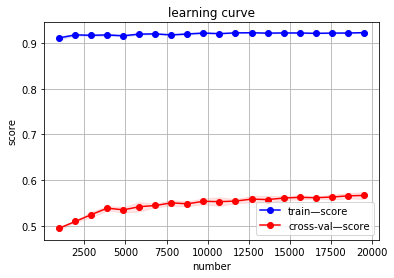

(0.7412825473345614, 0.36446335999247137)

In [40]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, 
                        train_sizes = np.linspace(.05, 1., 20), verbose = 0, plot = True):
    """
    plot learning curve.
    
    ----------
    estimator : which model 
    title : title of the table
    X : feature, type = numpy
    y : label
    ylim : tuple- (ymin, ymax)
    cv : cross-validation with default = 3
    n_jobs : parallel jobs
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"number")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train—score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross-val—score")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(br, "learning curve", X_train, y_train)

In [41]:
#xgb_baseline = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping=5)
#xgb_baseline.fit(X_train, y_train)
#y_pred = xgb_baseline.predict(X_test)

In [42]:
#plot_learning_curve(xgb_baseline, "learning curve", X_train, y_train)

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

In [45]:
rf_random = RandomizedSearchCV(estimator=clf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 74.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [47]:
best_random = rf_random.best_estimator_

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


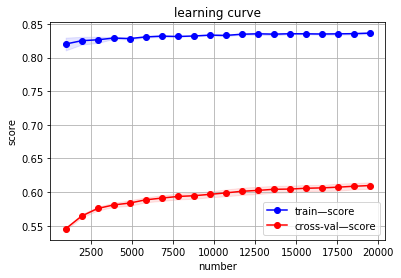

(0.7213421964322597, 0.23294661012098283)

In [49]:
plot_learning_curve(best_random, "learning curve", X_train, y_train)

In [51]:
# define cross validation strategy
def rmse_cv(model,x,y):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=3))
    return rmse

In [52]:
score = rmse_cv(best_random, X_test , y_test)
score.mean()

0.4405968364591472

In [53]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR , LinearSVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          SVR(),
          LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),
          SGDRegressor(max_iter=1000,tol=1e-3),
          BayesianRidge(),
          KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),
          XGBRegressor()
         ]

names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train , y_train)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 789398157.055412, 873502256.9287
Ridge: 0.440552, 0.0041
Lasso: 0.486904, 0.0035


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.443369, 0.0052
GBR: 0.428232, 0.0048


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR: 0.447832, 0.0042


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinSVR: 0.445625, 0.0047
Ela: 0.445907, 0.0042
SGD: 0.449415, 0.0037
Bay: 0.440438, 0.0042
Ker: 0.441752, 0.0041


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Extra: 0.456624, 0.0039
[02:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgb: 0.427695, 0.0044


GBR can potentialy further increase the precision. The work logic is the same, however for the sake of time being not presented here. (RF training took 9 hr to train.)

## 8. make predictions

In [54]:
std = StandardScaler()
test_x = std.fit_transform(X_test)
pred = best_random.predict(test_x)

In [55]:
prediction = pd.DataFrame(pred , columns = ['predicted_price'])
result = pd.concat([prediction] , axis = 1)
result.to_csv('prediction.csv',index=False)